# Pandas Data Structures

In [2]:
import numpy as np
import pandas as pd

Understanding language's data structures is the most important part for a good programming experience. Poor understanding of data structures leads to poor code in terms of efficiency and readability.

These notes are devoted to walk through all Pandas structures but also providing further readings for a deeper knowledge. A previous Numpy datastructures knowledge is required.

The covered Pandas data structures are:
* Series:
* DataFrames:

## Series

Series is an one-dimension structures that can hold any data type (boolean, integer, float or even Python objects).

### Series Creation

We can create Series from:
* Python dictionaries
* NumPy ndarrays
* a sclar value

The passed **index is a list of axis labels**. Thus, this separates into a few cases depending on what data is, this will provide an effective way to access data.

** From dictionary: **

In this case if no index is provided, it is extracted from dictionary keys, while the data is extracted from values.

In [4]:
d = {'a':5.,'b':5.,'c':5.}
i = ['x','y','z']
s1 = pd.Series(d)
print s1
s1.index

a    5
b    5
c    5
dtype: float64


Index([u'a', u'b', u'c'], dtype='object')

Otherwise, if index is passed, values with keys in index are pulled out, the rest are assigned to NaN. A NaN value means not assigned, and we will have to deal with these values in the future.

**//TODO: talk about NaN**

In [8]:
d = {'a':5,'b':5,'c':5}
i = ['x','y','a','b']
s1 = pd.Series(d, index = i)
print s1
print s1.dtype
s1.index

x   NaN
y   NaN
a     5
b     5
dtype: float64
float64


Index([u'x', u'y', u'a', u'b'], dtype='object')

** From numpy array: **

In [7]:
s2 = pd.Series(np.array([3,20,5]),index=['a','b','c'])
print s2
print s2.dtype
s2.index

a     3
b    20
c     5
dtype: int32
int32


Index([u'a', u'b', u'c'], dtype='object')

** From scalar: **

In [18]:
s3 = pd.Series(5,index=['a','b','c'])
print s3
print s3.dtype
s3.index

a    5
b    5
c    5
int32


Index([a, b, c], dtype=object)

Series can have the atribute **name**. When dealing with DataFrames, Series names will be automatically assigned with its column name.

In [48]:
s3 = pd.Series(5,index=['a','b','c'], name = 'Series3')
s3.name

'Series3'

### Series Accessing

Series can be accessed through position (numerical index), boolean ¿list? or key (axis of labels). Accessing by position is like working with numpy ndarrays while accessing through keys (axis of labels) is like working with dictionaries.

** Position accessing **

In [24]:
s2

a     3
b    20
c     5

In [25]:
s2[1]

20

In [26]:
s2[1:]

b    20
c     5

** Boolean list accessing **

In [27]:
s2[[True,True,False]]

a     3
b    20

In [28]:
s2[s2>4]

b    20
c     5

**Key accessing**

In [29]:
s2[['a','b']]

a     3
b    20

In [31]:
s2['a']

3

In [30]:
'a' in s2

True

In case of accessing an unexisting key, a KeyError exception is thrown

In [33]:
try:
    s2['z']
except KeyError:
    print "Error handled"

Error handled


To avoid errors, we can use Serie's get function, where a defaut value is returned in case of error.

In [35]:
s2.get('x',np.NaN)

nan

### Series Operations

**Vectorized operations** can be done over pandas Series and also Series are accepted as most of NumPy operations. The result of an operation between unaligned Series will have **the union of the indexes involved**. If a label is not found in one Series or the other, **the result will be marked as missing NaN**.

In [12]:
print s2 + 23
# we can apply np functions

np.add(s2,23) == s2 + 23

a    26
b    43
c    28
dtype: int32


a    True
b    True
c    True
dtype: bool

Operations are performed index-wise.

In [45]:
s2 + s1

a     8
b    25
c   NaN
x   NaN
y   NaN

In [46]:
(s2 + s1).dropna()

a     8
b    25

In [41]:
s2 ** 3

a      27
b    8000
c     125

In [42]:
np.exp(s2)

a    2.008554e+01
b    4.851652e+08
c    1.484132e+02

### Examples with Series

Before loading data from different sources, we can have some examples using series with self-generated data.

In [31]:
import csv
import urllib2

url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat'
response = urllib2.urlopen(url)
data = list(csv.reader(response))

#data is a list of list

We can create series from a list of lists directly from data variable.

In [6]:
pd.Series(data)

0     [1, Goroka, Goroka, Papua New Guinea, GKA, AYG...
1     [2, Madang, Madang, Papua New Guinea, MAG, AYM...
2     [3, Mount Hagen, Mount Hagen, Papua New Guinea...
3     [4, Nadzab, Nadzab, Papua New Guinea, LAE, AYN...
4     [5, Port Moresby Jacksons Intl, Port Moresby, ...
5     [6, Wewak Intl, Wewak, Papua New Guinea, WWK, ...
6     [7, Narsarsuaq, Narssarssuaq, Greenland, UAK, ...
7     [8, Nuuk, Godthaab, Greenland, GOH, BGGH, 64.1...
8     [9, Sondre Stromfjord, Sondrestrom, Greenland,...
9     [10, Thule Air Base, Thule, Greenland, THU, BG...
10    [11, Akureyri, Akureyri, Iceland, AEY, BIAR, 6...
11    [12, Egilsstadir, Egilsstadir, Iceland, EGS, B...
12    [13, Hornafjordur, Hofn, Iceland, HFN, BIHN, 6...
13    [14, Husavik, Husavik, Iceland, HZK, BIHU, 65....
14    [15, Isafjordur, Isafjordur, Iceland, IFJ, BII...
...
8092    [9527, Bus, Siem Reap, Cambodia, , SMRP, 13.36...
8093    [9528, Bus, Sihanoukville, Cambodia, , SNKV, 1...
8094    [9529, Bus, Kampot, Cambodia, , 

This is not a very useful Series object, as acces to list items is not syntatically nice. However, let's try to put the all countries' airports in a Series.

In [7]:
countries = pd.Series(np.array([airport[3] for airport in data]))
# this is a more interesting Series object
countries

0     Papua New Guinea
1     Papua New Guinea
2     Papua New Guinea
3     Papua New Guinea
4     Papua New Guinea
5     Papua New Guinea
6            Greenland
7            Greenland
8            Greenland
9            Greenland
10             Iceland
11             Iceland
12             Iceland
13             Iceland
14             Iceland
...
8092         Cambodia
8093         Cambodia
8094         Cambodia
8095         Cambodia
8096           Taiwan
8097        Australia
8098    United States
8099            Spain
8100           Canada
8101           Canada
8102           Canada
8103           Canada
8104           Canada
8105    United States
8106    United States
Length: 8107, dtype: object

In [8]:
print countries.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], dtype='int64')


In [136]:
## Access by number
print countries[0]
## we can evaluate a function over all elements to get a boolean series
print (countries == "Spain").head()
print (countries[countries == "Spain"]).head()
print (countries[countries != "Spain"]).head()
print (countries[countries != "Spain"]).tail()
# we can have the list of countries that have (at least
print countries.unique()

Papua New Guinea
0    False
1    False
2    False
3    False
4    False
dtype: bool
1033    Spain
1034    Spain
1035    Spain
1036    Spain
1037    Spain
dtype: object
0    Papua New Guinea
1    Papua New Guinea
2    Papua New Guinea
3    Papua New Guinea
4    Papua New Guinea
dtype: object
8102           Canada
8103           Canada
8104           Canada
8105    United States
8106    United States
dtype: object
['Papua New Guinea' 'Greenland' 'Iceland' 'Canada' 'Algeria' 'Benin'
 'Burkina Faso' 'Ghana' "Cote d'Ivoire" 'Nigeria' 'Niger' 'Tunisia' 'Togo'
 'Belgium' 'Germany' 'United States' 'Estonia' 'Finland' 'United Kingdom'
 'Guernsey' 'Jersey' 'Isle of Man' 'Falkland Islands' 'Netherlands'
 'Ireland' 'Denmark' 'Faroe Islands' 'Luxembourg' 'Norway' 'Poland'
 'Sweden' 'South Africa' 'Botswana' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Swaziland' 'Central African Republic'
 'Equatorial Guinea' 'Saint Helena' 'Mauritius'
 'British Indian Ocean Territory' 'Cameroon' 'Zambia' 'Comoros' '

In [16]:
# we can also access by key
countries[8106]

'United States'

We can see that there's an error between index and the number provided as index in the csv. Let's try to see what happened with the knowledge we have with Series.

In [39]:
csv_index = pd.Series(np.array([airport[0] for airport in data]))
print csv_index[csv_index.astype(int) != csv_index.index + 1]

117    119
118    120
119    121
120    122
121    123
122    124
123    125
124    126
125    127
126    128
127    129
128    130
129    131
130    132
131    133
...
8092    9527
8093    9528
8094    9529
8095    9530
8096    9531
8097    9532
8098    9533
8099    9534
8100    9535
8101    9536
8102    9537
8103    9538
8104    9539
8105    9540
8106    9541
Length: 7990, dtype: object


In [133]:
# we get the list of all missing values
shifted_index = csv_index[csv_index.index-1]
shifted_index = shifted_index.fillna(0)
shifted_index.index = csv_index.index
# we get the list of non consecutive values
non_consecutive = csv_index[csv_index.astype(int) != shifted_index.astype(int) + 1].astype(int)
print non_consecutive.head(10)
# check if our assumption is true (1 at most consecutive values are missing)
print "the assumption is:", len(non_consecutive) + len(csv_index) == csv_index[len(csv_index)-1]
# let's see what happens
difference = (shifted_index.astype(int) + 1).add(-csv_index.astype(int))
print difference[difference < -1]

117     119
221     224
318    6891
319     322
470     474
523     528
593     599
600     607
613     621
653     662
dtype: int32
the assumption is: False
318    -6570
814    -5983
931    -5867
1095   -5696
1104   -5766
1121   -5747
1166   -5700
1205   -5659
1453   -5409
1470   -5391
1507   -5351
1617   -5239
1676   -5178
1687   -5164
1695   -5153
...
4971     -91
5288      -2
5311   -2398
5360   -1641
5365      -2
5372      -8
5385    -418
5521    -233
6087    -410
6206    -788
6283    -460
6354     -80
6438    -556
6990      -3
7365    -166
Length: 123, dtype: int32


## DataFrame

A DataFrame is a 2-dimensional **labeled** data structure with columns of diferent types. It can be seen as a spreadsheet, where columns are Series or a Python dictionary where Series can be accessed through labels.

### DataFrame Creation

We can create DataFrames from:
* Dict of 1D ndarrays, lists, dicts, or Series
* 2-D numpy.ndarray
* Structured or record ndarray
* A Series
* Another DataFrame

** From dict of Series or dict **

The result **index** will be the **union** of the indexes of the various Series. If there are any nested dicts, these will be first converted to Series. If no columns are passed, the columns will be the sorted list of dict keys.



In [58]:
d = {'one': pd.Series([1,2,3],index=['a','b','c']),'two': pd.Series([1,2,3,4],index=['a','b','c','z']),'three':{'a':1}}
df = pd.DataFrame(d)
df

,one,three,two
a,1,1,1
b,2,NaN,2
c,3,NaN,3
z,NaN,NaN,4


In [56]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,three,two
d,NaN,NaN,NaN
b,2,NaN,2
a,1,1,1


In [57]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three','four'])

,two,three,four
d,NaN,NaN,NaN
b,2,NaN,NaN
a,1,1,NaN


The row and column labels can be accessed respectively by accessing the index and columns attributes:

In [59]:
df.index

Index([a, b, c, z], dtype=object)

In [60]:
df.columns

Index([one, three, two], dtype=object)

** From dict of ndarrays / lists **

The ndarrays must all be the same length. If an index is passed, it must clearly also be the same length as the arrays. If no index is passed, the result will be <code>range(n)</code>, where n is the array length.

In [14]:
d = {'one' : [1., 2., 3., 4.], 'two' : [4., 3., 2., 1.]}
pd.DataFrame(d)

,one,two
0,1,4
1,2,3
2,3,2
3,4,1


In [16]:
pd.DataFrame(d, index = ['a','b','c','d'])

,one,two
a,1,4
b,2,3
c,3,2
d,4,1


**From structured or record array**

This case is handled identically to a dict of arrays.
** TODO: explain better dtype in numpy **

In [21]:
data = np.zeros((2,), dtype=[('A', 'i4'),('B', 'f4'),('C', 'a10')])
print data
data[:] = [(1,2.,'Hello'), (2,3.,"World")]
print data
pd.DataFrame(data)

[(0, 0.0, '') (0, 0.0, '')]
[(1, 2.0, 'Hello') (2, 3.0, 'World')]


,A,B,C
0,1,2,Hello
1,2,3,World


In [22]:
pd.DataFrame(data, index=['first', 'second'])

,A,B,C
first,1,2,Hello
second,2,3,World


In [23]:
pd.DataFrame(data, columns=['C', 'A', 'B'])

,C,A,B
0,Hello,1,2
1,World,2,3


** From a list of dicts **

In [26]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20


In [27]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20


In [29]:
pd.DataFrame(data2, columns=['a', 'b'])

,a,b
0,1,2
1,5,10


**From a dict of tuples**

You can automatically create a multi-indexed frame by passing a tuples dictionary





In [30]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
   ....:               ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
   ....:               ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
   ....:               ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
   ....:               ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a           b    
      a   b   c   a   b
A B   4   1   5   8  10
  C   3   2   6   7 NaN
  D NaN NaN NaN NaN   9

[Alternate constructors](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#alternate-constructors)

### Column selection, addition, deletion

We will go through these examples using a real dataset. Remember from Series examples that we loaded a csv. We did it using <code> csv </code> library, however, Pandas provide the necessary tools to read a csv file and output a DataFrame. Let's see an example using [OpenFlight](http://openflights.org/data.html) data. The data is structured as follows:

* **Airport ID**	Unique OpenFlights identifier for this airport.
* **Name**	Name of airport. May or may not contain the City name.
* **City**	Main city served by airport. May be spelled differently from Name.
* **Country**	Country or territory where airport is located.
* **IATA/FAA**	3-letter FAA code, for airports located in Country "United States of America". 3-letter IATA code, for all other airports. Blank if not assigned.
* **ICAO**	4-letter ICAO code. Blank if not assigned.
* **Latitude**	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
* **Longitude**	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
* **Altitude**	In feet.
* **Timezone**	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
* **DST**	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
* **Tz database time zone**	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".

In [3]:
import pandas as pd
import urllib2

url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat'
response = urllib2.urlopen(url)
head = ["Airport ID", "Name", "City", "Country", "IATA/FAA", "ICAO", "Latitude", "Longitude", 
        "Altitude", "Timezone", "DST", "Tz database time zone"]
data_frame = pd.read_csv(response,names=head)
data_frame.head()

,Airport ID,Name,City,Country,IATA/FAA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby


In [4]:
data_frame["Name"].head()

0                        Goroka
1                        Madang
2                   Mount Hagen
3                        Nadzab
4    Port Moresby Jacksons Intl
Name: Name, dtype: object

In [5]:
(data_frame["Name"] + data_frame["ICAO"]).head()

0                        GorokaAYGA
1                        MadangAYMD
2                   Mount HagenAYMH
3                        NadzabAYNZ
4    Port Moresby Jacksons IntlAYPY
dtype: object

In [5]:
data_frame["Altitude (m)"] = (data_frame["Altitude"] * 0.3048)
data_frame["Seaside"] = data_frame["Altitude (m)"] < 20
data_frame[data_frame["Seaside"]].head()

,Airport ID,Name,City,Country,IATA/FAA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Altitude (m),Seaside
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby,6.0960,True
5,6,Wewak Intl,Wewak,Papua New Guinea,WWK,AYWK,-3.583828,143.669186,19,10.0,U,Pacific/Port_Moresby,5.7912,True
10,11,Akureyri,Akureyri,Iceland,AEY,BIAR,65.659994,-18.072703,6,0.0,N,Atlantic/Reykjavik,1.8288,True
12,13,Hornafjordur,Hofn,Iceland,HFN,BIHN,64.295556,-15.227222,24,0.0,N,Atlantic/Reykjavik,7.3152,True
13,14,Husavik,Husavik,Iceland,HZK,BIHU,65.952328,-17.425978,48,0.0,N,Atlantic/Reykjavik,14.6304,True


In [6]:
# Columns can be deleted or popped like with a dict:
del data_frame["Altitude"]
seaside = data_frame.pop('Seaside')
print seaside.head()
data_frame.head()

0    False
1     True
2    False
3    False
4    False
Name: Seaside, dtype: bool


,Airport ID,Name,City,Country,IATA/FAA,ICAO,Latitude,Longitude,Timezone,DST,Tz database time zone,Altitude (m)
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,10.0,U,Pacific/Port_Moresby,1609.9536
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,10.0,U,Pacific/Port_Moresby,6.0960
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,10.0,U,Pacific/Port_Moresby,1642.2624
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,10.0,U,Pacific/Port_Moresby,72.8472
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,10.0,U,Pacific/Port_Moresby,44.5008


In [7]:
# When inserting a scalar value, it will naturally be propagated to fill the column:
data_frame["Infrastructure"] = "Airport" 

** Assigning New Columns in Method Chains **

Inspired by dplyr’s <code> mutate </code> verb, DataFrame has an assign() method that allows you to easily create new columns that are potentially derived from existing columns.

In [8]:
(data_frame.assign(hemisphere_north = lambda x: x['Latitude'].astype(float) > 0)).head(10)

,Airport ID,Name,City,Country,IATA/FAA,ICAO,Latitude,Longitude,Timezone,DST,Tz database time zone,Altitude (m),Infrastructure,hemisphere_north
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,10.0,U,Pacific/Port_Moresby,1609.9536,Airport,False
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,10.0,U,Pacific/Port_Moresby,6.0960,Airport,False
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,10.0,U,Pacific/Port_Moresby,1642.2624,Airport,False
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,10.0,U,Pacific/Port_Moresby,72.8472,Airport,False
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,10.0,U,Pacific/Port_Moresby,44.5008,Airport,False
5,6,Wewak Intl,Wewak,Papua New Guinea,WWK,AYWK,-3.583828,143.669186,10.0,U,Pacific/Port_Moresby,5.7912,Airport,False
6,7,Narsarsuaq,Narssarssuaq,Greenland,UAK,BGBW,61.160517,-45.425978,-3.0,E,America/Godthab,34.1376,Airport,True
7,8,Nuuk,Godthaab,Greenland,GOH,BGGH,64.190922,-51.678064,-3.0,E,America/Godthab,86.2584,Airport,True
8,9,Sondre Stromfjord,Sondrestrom,Greenland,SFJ,BGSF,67.016969,-50.689325,-3.0,E,America/Godthab,50.2920,Airport,True
9,10,Thule Air Base,Thule,Greenland,THU,BGTL,76.531203,-68.703161,-4.0,E,America/Thule,76.5048,Airport,True


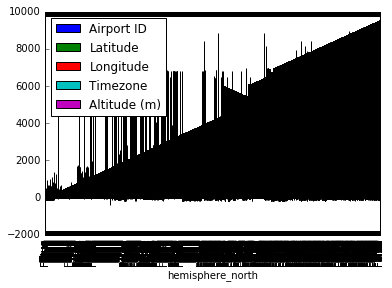

In [9]:
%matplotlib inline
(data_frame.assign(hemisphere_north = lambda x: x['Latitude'].astype(float) > 0)).plot(kind='bar', x='hemisphere_north')

## Exercices

!!!! TO BE DONE !!!!